# MITx - 6.419x
## Data Analysis: Statistical Modeling and Computation in Applications: Spring 2021
### Homework 2: Written Report by J. Andrew Seidel

### **Part 1: Visualization**

A scientist tells you that cells in the brain are either excitatory neurons, inhibitory neurons, or non-neuronal cells. Cells from each of these three groups serve different functions within the brain. Within each of these three types, there are numerous distinct sub-types that a cell can be, and sub-types of the same larger class can serve similar functions. Your goal is to produce visualizations which show how the scientist's knowledge reflects in the data.

As in Problem 1, we recommend using PCA before running T-SNE or clustering algorithms, for quality and computational reasons.

(3 points) Provide at least one visualization which clearly shows the existence of the three main brain cell types described by the scientist, and explain how it shows this. Your visualization should support the idea that cells from a different group (for example, excitatory vs inhibitory) can differ greatly.

Provide at least one visualization which supports the claim that within each of the three types, there are numerous possible sub-types for a cell. In your visualization, highlight which of the three main types these sub-types belong to. Again, explain how your visualization supports the claim.

In [57]:
#Import Libraries and set plotting parameters
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [50]:
#Load and Transform the p2_unsupervised data set
X = np.load('./data/p2_unsupervised/X.npy')
def logtrans(X):
    return np.log2(X+1)

Xt = np.array(list(map(logtrans, X)))

(2169, 45768)


In [58]:
#Peform Principal Component Analysis on the transformed dataset
pca = PCA() # Initialize with n_components parameter to only find the top eigenvectors
z = pca.fit_transform(Xt)

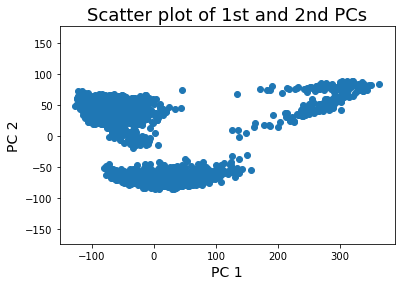

In [22]:
#Plot 1st vs 2nd Principal Components
plt.scatter(z[:,0],z[:,1])
plt.title("Scatter plot of 1st and 2nd PCs",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

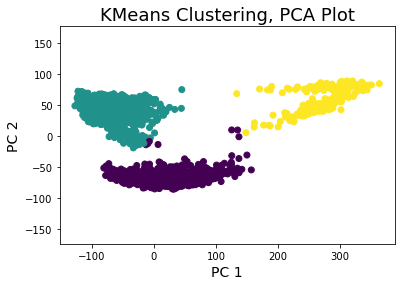

In [60]:
kmeans = KMeans(n_clusters=3,n_init=10)
y = kmeans.fit_predict(z)
plt.scatter(z[:,0],z[:,1], c=y)
plt.title("KMeans Clustering, PCA Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

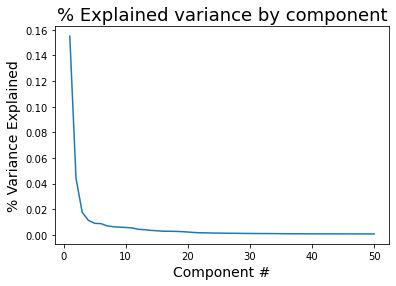

In [28]:
plt.plot(np.arange(1,51),pca.explained_variance_ratio_[0:50])
plt.title("% Explained variance by component",size=18)
plt.xlabel("Component #",size=14)
plt.ylabel("% Variance Explained",size=14)
plt.show()

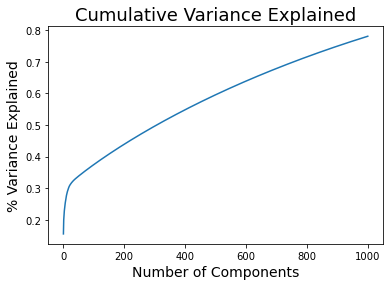

In [52]:
#
PCAs = 1000
plt.plot(np.arange(1,PCAs + 1),np.cumsum(pca.explained_variance_ratio_[0:PCAs]))
plt.title("Cumulative Variance Explained",size=18)
plt.xlabel("Number of Components",size=14)
plt.ylabel("% Variance Explained",size=14)
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2169 samples in 0.003s...
[t-SNE] Computed neighbors for 2169 samples in 0.202s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2169
[t-SNE] Computed conditional probabilities for sample 2000 / 2169
[t-SNE] Computed conditional probabilities for sample 2169 / 2169
[t-SNE] Mean sigma: 42.267420
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.708809
[t-SNE] KL divergence after 1000 iterations: 1.331856


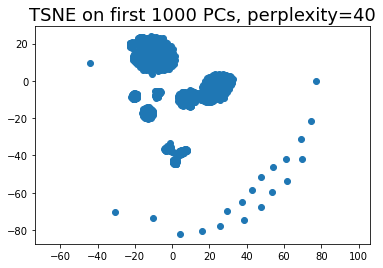

In [56]:

perplex = 40
PCA_Dim = 1000
title = "TSNE on first " + str(PCA_Dim) + " PCs, perplexity=" + str(perplex)
tsne = TSNE(n_components=2,verbose=1,perplexity=perplex)
z_tsne = tsne.fit_transform(z[:,0:PCA_Dim])
plt.scatter(z_tsne[:,0],z_tsne[:,1])
plt.title(title,size=18)
plt.axis("equal")
plt.show()

### **Part 2: Unsupervised Feature Selection**

Now we attempt to find informative genes which can help us differentiate between cells, using only unlabeled data. A genomics researcher would use specialized, domain-specific tools to select these genes. We will instead take a general approach using logistic regression in conjunction with clustering. Briefly speaking, we will use the p2_unsupervised dataset to cluster the data. Treating those cluster labels as ground truth, we will fit a logistic regression model and use its coefficients to select features. Finally, to evaluate the quality of these features, we will fit another logistic regression model on the training set in p2_evaluation, and run it on the test set in the same folder.

Using your clustering method(s) of choice, find a suitable clustering for the cells. Support your choice of clustering with appropriate visualizations and/or numerical findings. Be sure to briefly explain how you chose the number of clusters.

We will now treat your cluster assignments as labels for supervised learning. Fit a logistic regression model to the original data (not principal components), with your clustering as the target labels. Since the data is high-dimensional, make sure to regularize your model using your choice of ℓ1, ℓ2, or elastic net, and separate the data into training and validation or use cross-validation to select your model. Report your choice of regularization parameter and validation performance.

Select the features with the top 100 corresponding coefficient values (since this is a multi-class model, you can rank the coefficients using the maximum absolute value over classes, or the sum of absolute values). Take the evaluation training data and use a subset of the genes, consisting of the features you selected. Train a logistic regression classifier on this training data, and evaluate its performance on the evaluation test data. Report your score. Compare with two baselines: random features (take a random selection of 100 genes), and high-variance features (take the 100 genes with highest variance). Compare the variances of the features you selected with the highest variance features by plotting a histogram of the variances of features selected by both methods.